# Importing Libraries, Hardcoding Search Engine Information

## Reverse image search inspiration


Gists taken from : https://gist.github.com/erm3nda/1f3819c71a6ca95d0bb32053536bb9f3

and : https://medium.com/geekculture/scraping-images-using-selenium-f35fab26b122

In [413]:
## TEST SCRIPT FOR GOOGLE WEBDRIVER
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
 
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
 
driver.get("https://python.org")
print(driver.title)
driver.close()

Welcome to Python.org


## Importing Libraries

In [414]:
import os, sys, re, io #handling files
import base64
from tqdm import tqdm

#############################################################################

import requests # HTTP
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import webbrowser 

#############################################################################
import numpy as np # math
import json

#############################################################################
import threading #for multiple browsers at the same time
import logging
import time

#############################################################################
import pdb #because this didnt work on first try

###########################################################
import selenium # Bot

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.remote.webelement import WebElement 
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
###############################################################################
#Image processing for testing 
import PIL
from PIL import Image
##
from pyvirtualdisplay import Display

## Check your Python Version
This code needs the swith-case function available in python 3.10 to handle the differences between the different websites simultaneously.

In [415]:
print(sys.version)

3.10.6 (main, Aug 10 2022, 11:40:04) [GCC 11.3.0]


## Graphic or Headless Options & Starting Virtual Display

In [416]:
display = Display(visible=0, size=(1920, 1080))
display.start()

In [417]:
def SetupOptions():
    #enable-lens-fullscreen-search
    #enable-lens-standalone
    options = Options()
    options.headless=False #True
    options.add_argument("--start-maximized");
    options.add_argument("--disable-dev-shm-usage");
    options.add_argument("--no-experiments");
    options.add_argument("--disable-plugins");
    options.add_argument("--incognito");
    options.add_experimental_option("excludeSwitches", ["enable-automation"]);
    options.add_experimental_option('useAutomationExtension', False)
    
    
    return options

### Testing Script

In [418]:
print(SetupOptions().headless)

False


## SearchEngine Class

In [419]:
class SearchEngine():
    def __init__(self, URL:str,ID:int, thumbnail:str, image:str,load:str, options = SetupOptions()):
        self.URL = URL
        self.ID = ID
        self.thumbnail = thumbnail
        self.image = image
        self.load = load
        self.options = options
        

## Building Google SearchEngine:

In [420]:
Google= SearchEngine(URL="https://images.google.com/searchbyimage/upload",
               ID=0,
               thumbnail=(By.CSS_SELECTOR,"img.Q4LuWd"),
               image = (By.XPATH,"//*[@id=\"Sva75c\"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img"),
               load = (By.CSS_SELECTOR,".mye4qd"))

## Building Yandex SearchEngine:

In [421]:
Yandex= SearchEngine(URL="https://yandex.com/images/search",
                     ID=1,
                     thumbnail=(By.XPATH,"//div[@class='serp-item__preview']/a/img"),
                     image = (By.XPATH,"//div[@class='MMImageContainer']/img"),
                     load = "")


## Building Sogou SearchEngine:

In [422]:
Sogou= SearchEngine(URL='https://pic.sogou.com/',
                    ID=2,
                    thumbnail=(By.XPATH,"//div[@class='img-layout']/a/img"),
                    image = (By.XPATH, "//div[@id='imgArea']/div[3]/div/div/a/img"),
                    #image = (By.XPATH, "//*[@id=\"imgArea\"]/div[3]/div/div/a/img"),
                    #image = (By.XPATH,"//div[@class='img-box']/a/img"),
                    load = "")

## Engine_List

In [423]:
Engine_List= []
Engine_List.append(Google)#0
Engine_List.append(Yandex)#1
Engine_List.append(Sogou)#2

for engine in Engine_List:
    print(engine.URL,
      "\n",
      "ID:", engine.ID,
      "\n",
      "Thumbnail:", engine.thumbnail,
      "\n",
      "Image:", engine.image,
      "\n",
      "Load_Button:", engine.load,"\n\n")

https://images.google.com/searchbyimage/upload 
 ID: 0 
 Thumbnail: ('css selector', 'img.Q4LuWd') 
 Image: ('xpath', '//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img') 
 Load_Button: ('css selector', '.mye4qd') 


https://yandex.com/images/search 
 ID: 1 
 Thumbnail: ('xpath', "//div[@class='serp-item__preview']/a/img") 
 Image: ('xpath', "//div[@class='MMImageContainer']/img") 
 Load_Button:  


https://pic.sogou.com/ 
 ID: 2 
 Thumbnail: ('xpath', "//div[@class='img-layout']/a/img") 
 Image: ('xpath', "//div[@id='imgArea']/div[3]/div/div/a/img") 
 Load_Button:  




# Browsing using Selenium

## Definiting Basic Functions to Start and Fetch Pages

In [424]:
def StartDriver(Engine:SearchEngine,initial_wait:int=10):
    driverpath='/usr/local/bin/chromedriver/'
    try:
        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=Engine.options)
        driver.get(Engine.URL)
        WebDriverWait(driver,initial_wait);
        print ("Chrome Driver #",Engine.ID," Initialized")
        return driver
        #driver.quit()
        
    except Exception as e:
        print ("FAILURE: Chrome Driver #",Engine.ID,"Not Initialized","Exception:",e)

## Uploading Photographs to Different Websites

### Google

In [425]:
def GoogleUpload(Engine:SearchEngine, img_path:str, wait_button_click:int=5):
    try:
        # This avoids the annoying "Google Lens" Feature (or Bug rather) present in chrome
        multipart = {'encoded_image': (img_path, open(img_path, 'rb')), 'image_content': ''}
        response = requests.post('http://www.google.com/searchbyimage/upload', files=multipart, allow_redirects=False)
        print(response)
        fetchUrl = response.headers['Location']
        Engine.URL=fetchUrl
        driver=StartDriver(Engine)
        driver.find_element(By.XPATH,"//a[contains(.,'similar images')]").click()
        print('ENGINE #',Engine.ID,' Uploaded File, Now Scraping Similar Images...')
    except Exception as e:
        print (e)
        
    return driver

In [426]:
file_path = '/home/cescollino/Documents/ETS/MAITRISE/Dataset/cat.jpg'

### Yandex

In [427]:
def YandexUpload(Engine:SearchEngine, img_path:str, wait_button_click:int=5):
    try:
        driver=StartDriver(Engine)
        driver.find_element(By.XPATH,"/html/body/header/div/div[1]/div[2]/form/div[1]/span/span/button").click()
        driver.find_element(By.XPATH,"//input[@type='file']").send_keys(img_path);
        WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.XPATH, "//a[contains(.,'Similar images')]"))
        )
        driver.find_element(By.XPATH,"//a[contains(.,'Similar images')]").click()
        WebDriverWait(driver, 2)
        driver.back()
        driver.forward()
        print('ENGINE #',Engine.ID,' Uploaded File, Now Scraping Similar Images...')
    except Exception as e:
        print (e)
    return driver

### Sogou

In [428]:
def SogouUpload(Engine:SearchEngine, img_path:str, wait_button_click:int=5):
    try:
        driver=StartDriver(Engine)
        driver.find_element(By.XPATH,"//input[@type='file']").send_keys(img_path);
        print('ENGINE #',Engine.ID,' Uploaded File, Now Scraping Similar Images...')
    except Exception as e :
        print(e)
        
    return driver

## Upload depending on ID

In [429]:
def UploadPhoto(Engine:SearchEngine , img_path:str):
    print(Engine.ID)
    match Engine.ID:
        case 0:
            
            return GoogleUpload(Engine=Engine, img_path=img_path)
        
        case 1:
            
            return YandexUpload(Engine=Engine, img_path=img_path)
        
        case 2:
            
            return SogouUpload(Engine=Engine, img_path=img_path)

        # If an exact match is not confirmed, this last case will be used if provided
        case _:
            
            return "Something's wrong"

## Scroll to end

In [430]:
def scroll_to_end(wd,sleep:int=5):
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    wd.implicitly_wait(sleep)
    
                    ##############################################################################################################

## Fetching Image Binaries

In [431]:
def Fetch_Image_Data(actual_image):
    try:
        
        ##FETCHING LINK##
        #Make a request to a web page, and return the status code
        #actual_image is a URL
        image_content = requests.get(actual_image.get_attribute('src')).content
        return image_content
        
    except Exception as e:
        
        print(f"ERROR - Could not download {actual_image.get_attribute('src')} - {e}")
        return e
                    ##############################################################################################################

### Test Script
Dummy=Google
Dummy.URL="https://unsplash.com/photos/37Dw48o0fb4"
driver = StartDriver(Dummy)

element_css = 'div.omfF5:nth-child(3) > div:nth-child(3) > div:nth-child(1) > img:nth-child(1)'
element = driver.find_element(By.CSS_SELECTOR, element_css)

result = Fetch_Image_Data(element)

print(type(result))
result = io.BytesIO(result)
photo = PIL.Image.open(result)
photo.show()

"""
Works
"""

## Saving Image and Link information

In [432]:
def Save_Img(actual_image, target_folder:str,ID:int):
    
    if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
        
        try:
            ##NUMBER##
            n = open(os.path.join(target_folder,'count.txt'),'r')
            counts = n.readlines()
            n.close()
            count = int(counts[ID][:-1])+1
            
            
            ##IMAGE##
            path=os.path.join(target_folder, 'jpg' + "_" + str(count) + "_EngineID_"+ str(ID) +".jpg")
            print(path)
            f = open(path, 'wb')
            f.write(Fetch_Image_Data(actual_image))
            f.close()
            counts[ID]=str(count)+('\n')
            
            n = open(os.path.join(target_folder,'count.txt'),'w')
            n.writelines(counts)
            n.close()
            ##LINK##
            t = open(os.path.join(target_folder, "links_ENGINEID_"+str(ID)+".txt"), 'a', encoding="utf-8")
            t.write(actual_image.get_attribute('src')+'\n')
            t.close()

            print(f"SUCCESS - saved {actual_image.get_attribute('src')} - as {count} from DRIVER ID : {ID}")

        except Exception as e:

            print(f"ERROR - Could not save {actual_image.get_attribute('src')} - {e} DRIVER ID: {ID}")
            
        return 1
    else:
        print("Invalid Image Attribute, cannot save")
        return 0               
                    ##############################################################################################################

## Iterating through all the images, clicking and saving

Note: # "//div[@class='the class I want']/img" or "//a[@class='the class I want']/img" navigates to image inside div or anchor

In [433]:
def FindResults(nav,searchengine):
    scroll_to_end(nav)
    thumbnail_results = nav.find_elements(*searchengine.thumbnail)
    #print(len(thumbnail_results))
    return thumbnail_results

In [434]:
def ClickLoadMore(nav,engine:SearchEngine):
    load_more_button = nav.find_elements(*engine.load)
    
    #if load_more_button:
    #    nav.execute_script("document.querySelector('"+engine.load[1]+"').click();")

## Google Scraping

In [435]:
def GoogleScrape(driver,engine:SearchEngine,count:int,path:str,max_count:int, results_start:int):
    with tqdm(total=max_count) as pbar:
        while count < max_count:

            thumbnails=FindResults(driver,engine)
            number_results=len(thumbnails)
            print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")

            for thumb in thumbnails[results_start:number_results]:

                try:
                    thumb.click()
                    image=driver.find_element(*engine.image)
                    time.sleep(1)
                    count=count+Save_Img(actual_image=image,target_folder=path, ID = engine.ID)

                except Exception as e:
                    print(e)

            if count >= max_count:
                    print(f"Found: {count} image links, done!")
                    break

            else:
                    print("Found:",count, "image links, looking for more ...")
                    time.sleep(2)

            scroll_to_end(driver)
            results_start = len(thumbnails)
            pbar.update(count)
    return count

## Yandex Scraping

In [436]:
def YandexScrape(driver,engine:SearchEngine,count:int,path:str,max_count:int, results_start:int):
    with tqdm(total=max_count) as pbar:
        while count < max_count:
            driver.switch_to.window(driver.window_handles[0])
            thumbnails=FindResults(driver,engine)
            number_results=len(thumbnails)
            print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")

            for thumb in thumbnails[results_start:number_results]:

                try:
                    driver.switch_to.window(driver.window_handles[0])
                    time.sleep(1)
                    thumb.click()
                    image=driver.find_element(*engine.image)#(By.XPATH,"//div[@class='MMImageContainer']/img")
                    time.sleep(1)
                    count=count+Save_Img(actual_image=image,target_folder=path,ID=engine.ID)
                    driver.back()
                    driver.switch_to.window(driver.window_handles[0])

                except Exception as e:
                    print(e)

            if count >= max_count:
                    print(f"Found: {count} image links, done!")
                    break

            else:
                    print("Found:",count, "image links, looking for more ...")
                    time.sleep(2)

            scroll_to_end(driver)
            results_start = len(thumbnails)
            pbar.update(count)
    return count

## WORKS

## Sogou Scraping

In [437]:
def SogouScrape(driver,engine:SearchEngine,count:int,path:str,max_count:int, results_start:int):
    with tqdm(total=max_count) as pbar:
        while count < max_count:

            thumbnails=FindResults(driver,engine)
            number_results=len(thumbnails)
            print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")

            for thumb in thumbnails[results_start:number_results]:

                try:
                    thumb.click()
                    driver.switch_to.window(driver.window_handles[1])
                    image=driver.find_element(*engine.image)
                    time.sleep(1)
                    count=count+Save_Img(actual_image=image,target_folder=path,ID=engine.ID)
                    driver.close()

                except Exception as e:
                    print(e)

                driver.switch_to.window(driver.window_handles[0])

            if count >= max_count:
                    print(f"Found: {count} image links, done!")
                    break

            else:
                    print("Found:",count, "image links, looking for more ...")
                    time.sleep(2)

            scroll_to_end(driver)
            results_start = len(thumbnails)
            pbar.update(count)
    return count


In [438]:
def Scrape(engine:SearchEngine,img_path:str,result_path:str,max_count:int=100):
    driver = UploadPhoto(engine, img_path=img_path)
    count=0
    results_start=0
    print("ID:",engine.ID,"count:",count,"max:", max_count)
    match engine.ID:
        case 0:
            GoogleScrape(driver=driver,
                        engine=engine,
                        count=count,
                        path=result_path,
                        max_count=max_count,
                        results_start=results_start)
        case 1:
            YandexScrape(driver=driver,
                        engine=engine,
                        count=count,
                        path=result_path,
                        max_count=max_count,
                        results_start=results_start)
        case 2:
            SogouScrape(driver=driver,
                        engine=engine,
                        count=count,
                        path=result_path,
                        max_count=max_count,
                        results_start=results_start)
        case other:
            print("ERROR, ENGINE ID MISSING")

## Putting everything together

# Multi-Threading

In [439]:
class myThread (threading.Thread):
   def __init__(self, engine:SearchEngine, img_path:str,result_path:str,max_count:int=100):
      threading.Thread.__init__(self)
      self.engine = engine
      self.img_path = img_path
      self.result_path = result_path
      self.max_count = max_count
   def run(self):
      Scrape(self.engine,self.img_path,self.result_path,max_count=self.max_count)

# Hardcoded File Paths & Run

In [440]:
file_path = '/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/INPUT/1.jpg'
destination_path = '/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/'
prompts_path = '/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/PROMPTS/'

files = len(os.listdir(prompts_path)) + 1
copy = 'cp ' + file_path + ' ' + prompts_path + 'prompt_' + str(files) +'.jpg'
os.system(copy)

#result_path= '/home/cescollino/Documents/ETS/MAITRISE/Dataset/Scraped_Dataset/cat/'
#result_path = '/home'

0

In [441]:
#Scrape(Google,file_path,destination_path,max_count=1000) # Yandex Works, Google Works, Sogou Works

0
1
2
<Response [302]>
Chrome Driver # 1  Initialized
Chrome Driver # 0  Initialized
Chrome Driver # 2  Initialized
ENGINE # 2  Uploaded File, Now Scraping Similar Images...
ID: 2 count: 0 max: 10000


  0%|                                                                         | 0/10000 [00:00<?, ?it/s]

ENGINE # 0  Uploaded File, Now Scraping Similar Images...
ID: 0 count: 0 max: 10000


  0%|                                                                         | 0/10000 [00:00<?, ?it/s]

Found: 50 search results. Extracting links from 0:50
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_753_EngineID_0.jpg
ERROR - Could not download https://dictionary.cambridge.org/images/thumb/infant_noun_002_19022.jpg?version=5.0.271 - ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
ERROR - Could not save https://dictionary.cambridge.org/images/thumb/infant_noun_002_19022.jpg?version=5.0.271 - a bytes-like object is required, not 'ConnectionError' DRIVER ID: 0
Message: element click intercepted: Element  is not clickable at point (216, 79). Other element would receive the click: <span jsslot="" jsname="dr7zhc" class="sal6Qd">...</span>
  (Session info: chrome=107.0.5304.87)
Stacktrace:
#0 0x55f063690463 <unknown>
#1 0x55f0634548d8 <unknown>
#2 0x55f06349a23b <unknown>
#3 0x55f063497a79 <unknown>
#4 0x55f063494fe4 <unknown>
#5 0x55f063493b21 <unknown>
#6 0x55f063486421 <unknown>
#7 0x55f0634b3622 <unknown>
#8 0x55f0
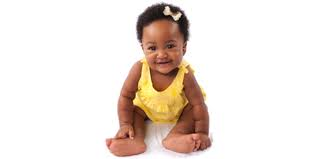

  0%|                                                                         | 0/10000 [00:00<?, ?it/s]

Invalid Image Attribute, cannot save
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_1_EngineID_2.jpg
Invalid Image Attribute, cannot save
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_758_EngineID_0.jpg
SUCCESS - saved https://i03piccdn.sogoucdn.com/73dd851310ee0319 - as 1 from DRIVER ID : 2
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1ylJ3zEh8qFYtHJhgfvijVDZzcIHPlHR7FwU5ZKYMd3QOscgW-i1Lpisdt4f_ThcAhuI&usqp=CAU - as 758 from DRIVER ID : 0
Invalid Image Attribute, cannot save
Found: 0 search results. Extracting links from 0:0
Found: 0 image links, looking for more ...
Invalid Image Attribute, cannot save
Invalid Image Attribute, cannot save
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_1_EngineID_2.jpg


  0%|                                                                         | 0/10000 [00:07<?, ?it/s]

Invalid Image Attribute, cannot save
SUCCESS - saved https://i03piccdn.sogoucdn.com/fef500db172b2af2 - as 1 from DRIVER ID : 2
Invalid Image Attribute, cannot save
Invalid Image Attribute, cannot save
Invalid Image Attribute, cannot save
Invalid Image Attribute, cannot save
Found: 0 search results. Extracting links from 0:0
Found: 0 image links, looking for more ...
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_2_EngineID_2.jpg
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_759_EngineID_0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT26AKfT_gh_wZ6CAqzpU_bT68DeHGOGWCWdw&usqp=CAU - as 759 from DRIVER ID : 0
SUCCESS - saved https://i03piccdn.sogoucdn.com/4597db30581e90d9 - as 2 from DRIVER ID : 2
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_759_EngineID_0.jpg


  0%|                                                                         | 0/10000 [00:14<?, ?it/s]

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLSrcSix3GkPPZLiUaOwSnNii1S0FUzuxvZQ&usqp=CAU - as 759 from DRIVER ID : 0
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_760_EngineID_0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAmO3-TK-SjbpltgtnUlUM127ZBRY_KkjsRw&usqp=CAU - as 760 from DRIVER ID : 0
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_761_EngineID_0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRgNjxyttk6T6Jgm43Ec5rn9mi9tzRGSXfCQ&usqp=CAU - as 761 from DRIVER ID : 0
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_762_EngineID_0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTEYxakY-_2ekcQOxBtaHosKYHbTaivT75LoQ&usqp=CAU - as 762 from DRIVER ID : 0
/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_3_EngineID_2.jpg
/home/cescollino/Workspace/Reverse-Image-Search-Scrape

  0%|                                                                         | 0/10000 [00:21<?, ?it/s]

/home/cescollino/Workspace/Reverse-Image-Search-Scraper/IMAGES/OUTPUT/jpg_4_EngineID_2.jpg
SUCCESS - saved https://i03piccdn.sogoucdn.com/0dc40a42ef459a9c - as 4 from DRIVER ID : 2
Message: element not interactable
  (Session info: chrome=107.0.5304.87)
Stacktrace:
#0 0x55f063690463 <unknown>
#1 0x55f06345475a <unknown>
#2 0x55f0634936a3 <unknown>
#3 0x55f063486421 <unknown>
#4 0x55f0634b3622 <unknown>
#5 0x55f063485ba7 <unknown>
#6 0x55f0634b378e <unknown>
#7 0x55f0634cc30f <unknown>
#8 0x55f0634b3443 <unknown>
#9 0x55f0634843c5 <unknown>
#10 0x55f063485531 <unknown>
#11 0x55f0636e2dce <unknown>
#12 0x55f0636e6192 <unknown>
#13 0x55f0636c793e <unknown>
#14 0x55f0636e7103 <unknown>
#15 0x55f0636bad85 <unknown>
#16 0x55f0637080a8 <unknown>
#17 0x55f063708239 <unknown>
#18 0x55f063723492 <unknown>
#19 0x7f7d1538bb43 <unknown>

Found: 0 search results. Extracting links from 0:0
Found: 0 image links, looking for more ...


  0%|                                                                         | 0/10000 [00:26<?, ?it/s]
Process Process-2:
  0%|                                                                         | 0/10000 [00:39<?, ?it/s]Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process Process-3:
Traceback (most recent call last):


KeyboardInterrupt: 

  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_326413/3908903804.py", line 22, in Scrape
    SogouScrape(driver=driver,

  File "/tmp/ipykernel_326413/3600530171.py", line 14, in SogouScrape
    image=driver.find_element(*engine.image)
  File "/home/cescollino/Workspace/Reverse-Image-Search-Scraper/scraper/lib/python3.10/site-packages/selenium/webdriver/remote/webdriver.py", line 856, in find_element
    return self.execute(Command.FIND_ELEMENT, {
  File "/tmp/ipykernel_326413/3908903804.py", line 15, in Scrape
    YandexScrape(driver=driver,
Process Process-1:
  File "/home/cescollino/Workspace/Reverse-Image-Search-Scraper/scraper/lib/python3.10/site-packages/selenium/webdriver/remote/webdriver.py", line 427, in execute
    response = self.command_executor.execute(driver_command, params)
  File "

In [446]:
##RUN
import multiprocessing
thread_list = []

for engine in Engine_List:
    # thread = myThread(engine,img_path=file_path,result_path=destination_path,max_count=10000)
    # thread_list.append(thread)
    
    process = multiprocessing.Process(
        target= Scrape,
        args=(engine,file_path,destination_path,10000)
    )
    thread_list.append(process)
    
for thread in thread_list:
    thread.start()

for thread in thread_list:
    thread.join()
